In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:

excel_file = r"C:\Users\Que\Documents\DATA SCIENCE\EXCEL DATA ANALYSIS FILES\Sample - Superstore.xls"
store = pd.read_excel(excel_file, 0, index_col=0)
store1 = pd.read_excel(excel_file, 1, index_col=0)
store1.columns.values
store2 = pd.merge(store,store1,how='outer',on='Order ID')
store2.shape

(9994, 21)

In [19]:
store2.drop_duplicates()
store2.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Order ID           9994 non-null object
Order Date         9994 non-null datetime64[ns]
Ship Date          9994 non-null datetime64[ns]
Ship Mode          9994 non-null object
Customer ID        9994 non-null object
Customer Name      9994 non-null object
Segment            9994 non-null object
Country            9994 non-null object
City               9994 non-null object
State              9994 non-null object
Postal Code        9994 non-null int64
Region             9994 non-null object
Product ID         9994 non-null object
Category           9994 non-null object
Sub-Category       9994 non-null object
Product Name       9994 non-null object
Sales              9994 non-null float64
Quantity           9994 non-null int64
Discount           9994 non-null float64
Profit             9994 non-null float64
Returned Orders    800 non-null object
dtypes: datetime64[ns](2), float64(3)

In [20]:
#Total no of orders
store2['Order ID'].nunique()

5009

In [9]:
# Total no of Customers
store2['Customer ID'].nunique()

793

In [3]:
# Sales per category
purchase_decision = store2[['Category','Sales']] 
purchase = purchase_decision.groupby(['Category'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Sales'], ascending = False)
purchase_sorted


,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


In [10]:
grouping('Category','Quantity')

In [24]:
# Total Quantity
store2['Quantity'].sum()

37873

In [4]:
# Quantity per Category
purchase_decision = store2[['Category','Quantity']] 
purchase = purchase_decision.groupby(['Category'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Quantity'], ascending = False)
purchase_sorted

,Category,Quantity
1,Office Supplies,22906
0,Furniture,8028
2,Technology,6939


In [84]:
#Total Profit
store2['Profit'].sum()

286397.0216999999

In [5]:
#Profit per category
purchase_decision = store2[['Category','Profit']] 
purchase = purchase_decision.groupby(['Category'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Profit'], ascending = False)
purchase_sorted


,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


In [95]:
# Total returns
store2['Returned Orders'].describe()

count     800
unique      1
top       Yes
freq      800
Name: Returned Orders, dtype: object

In [12]:
# Monthly Total Sales
store2.set_index(store2["Order Date"],inplace=True)
p = store2['Sales'].resample('Y').sum()
p


Order Date
2014-12-31    484247.4981
2015-12-31    470532.5090
2016-12-31    609205.5980
2017-12-31    733215.2552
Freq: A-DEC, Name: Sales, dtype: float64

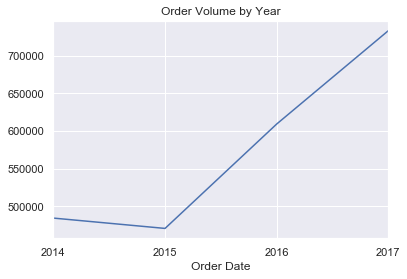

In [13]:
p.plot(kind='line')
plt.title('Order Volume by Year')
plt.show()

In [31]:
# Monthly Total Sales
store2.set_index(store2["Order Date"],inplace=True)
p = store2['Sales'].resample('M').sum()
pd.options.display.max_rows = 50
p

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

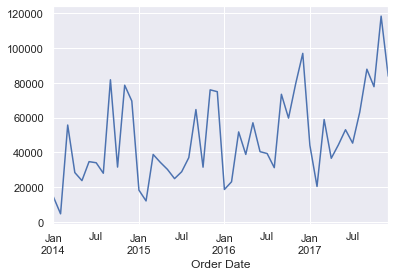

In [35]:
p.plot(kind='line')
plt.show()

In [4]:
# AveragePrice per Sub-Category
store2['Price'] = store2['Sales'] / store2['Quantity']
purchase_decision = store2[['Sub-Category','Price']] 
purchase = purchase_decision.groupby(['Sub-Category'], as_index=False).mean()
pd.options.display.max_rows = 40
purchase_sorte = purchase.sort_values(by=['Price'], ascending = False)
purchase_sorte


,Sub-Category,Price
6,Copiers,601.021029
11,Machines,423.352470
16,Tables,165.088613
5,Chairs,138.802472
4,Bookcases,131.100152
13,Phones,101.127993
14,Storage,70.451459
15,Supplies,69.308105
1,Appliances,60.618659
0,Accessories,55.356630


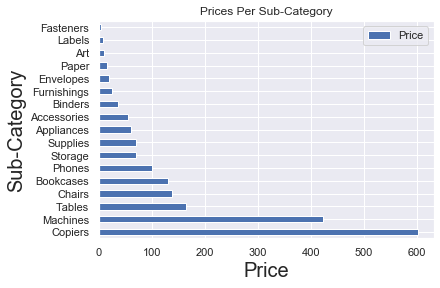

In [15]:
purchase_sorte.plot('Sub-Category','Price',kind='barh')
plt.xlabel('Price',fontsize=20)
plt.ylabel('Sub-Category',fontsize=20)
plt.title('Prices Per Sub-Category')
plt.show()


In [9]:
# Region with the highest sales

purchase_decision = store2[['Region','Sales']] 
purchase = purchase_decision.groupby(['Region'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Sales'], ascending = False)
purchase_sorted


,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


In [10]:
#state
purchase_decision = store2[['State','Sales']] 
purchase = purchase_decision.groupby(['State'], as_index=False).sum()
pd.options.display.max_rows = 50
purchase_sorted = purchase.sort_values(by=['Sales'], ascending = False)
purchase_sorted

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


In [11]:
# Segment
purchase_decision = store2[['Segment','Sales']] 
purchase = purchase_decision.groupby(['Segment'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Sales'], ascending = False)
purchase_sorted

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


In [12]:
purchase_decision = store2[['Country','Sales']] 
purchase = purchase_decision.groupby(['Country'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Sales'], ascending = False)
purchase_sorted

,Country,Sales
0,United States,2.297201e+06


In [9]:
purchase_decision = store2[['Sub-Category','Profit']] 
purchase = purchase_decision.groupby(['Sub-Category'], as_index=False).sum()
pd.options.display.max_rows = 40
purchase_sorted = purchase.sort_values(by=['Profit'], ascending = False)
purchase_sorted

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


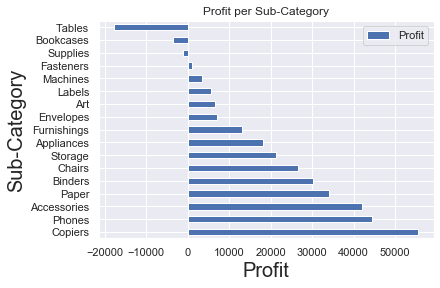

In [16]:
purchase_sorted.plot('Sub-Category','Profit',kind='barh')
plt.xlabel('Profit',fontsize=20)
plt.ylabel('Sub-Category',fontsize=20)
plt.title('Profit per Sub-Category')
plt.show()